# Script to change filenames of imgs

In [ ]:
#annotations_prepped_train/annotated_masks/ - MASKS
#/images_prepped_train/images/ - IMAGES

path = input("Enter a path: ")

import os
import glob

os.chdir(path)
for index, oldfile in enumerate(glob.glob("*.png"), start=1):
    newfile = 'img{:03}.png'.format(index)
    os.rename (oldfile,newfile)

# Script to create masks from heatmaps

In [1]:
import cv2
import numpy as np
import os

# func for bgr to hsv color scheme

def bgr_hsv(bgr):
    bgr_value = np.uint8([[bgr]])
    hsv_value = cv2.cvtColor(bgr_value, cv2.COLOR_BGR2HSV)
    lowerLimit = (hsv_value[0][0][0]-20,100,100)
    upperLimit = (hsv_value[0][0][0]+20,255,255)
    Low = np.array(lowerLimit)
    Up = np.array(upperLimit)
    return(Low, Up)
    
# script to proper mask images, (1,1,1),(2,2,2)...(6,6,6)

path = 'C:/Users/Vuori/!Keras/dataset/proper_mask/'

# levels for masks

levels = ([255,0,0],
          [170,255,0],
          [2,255,83],
          [0,246,235],
          [0,170,255],
          [0,85,255],
          [0,0,255],np.uint8)

# image[np.where((image==[0,0,0]).all(axis=2))] = [255,255,255]

# path = "E:/NN\'s/weights, data on so so/aug_proper" # that was for augmented imgs
for i, filename in enumerate(os.listdir(path)):
    os.chdir(path)
    
    # open image etc
    image = cv2.imread(filename)
    
    for j, level in enumerate(levels):
        # do smth with img, 7 because 7 heatmaps
        if (j == 7):
            break
            
        lowerLimit, upperLimit = bgr_hsv(levels[j])
        hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

        #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #plt.show()

        mask = cv2.inRange(hsv,lowerLimit,upperLimit)
        image[mask>0]=(j,j,j)

    cv2.imwrite("img{:03}.png".format(i+1),image)

# Creating paths to img dataset

In [2]:
import os

os.chdir("C:/Users/user/!Keras/FCN - lighting sources/")

# path to original imgs and folder where masks will be created (not heatmaps)

dir_data = "dataset"
dir_seg = dir_data + "/proper_mask/"; print(dir_seg)
dir_img = dir_data + "/image/"; print(dir_img)

# for augmented
#dir_seg = "E:/NN\'s/weights, data on so so/aug_proper/"; #print(dir_seg)
#dir_img = "E:/NN\'s/weights, data on so so/aug_original/"; #print(dir_img)

dataset/proper_mask/
dataset/image/


In [3]:
import cv2, os
import numpy as np

# ldseg = list(array) with names of all proper_mask images
all_seg = np.array(os.listdir(dir_seg));

# the img to show
fnm = all_seg[59]; print('first file is ' + str(all_seg[59] + '\n')) #filename - first image in folder

# read the original img
img = cv2.imread(dir_img + fnm);
print('the original img path is: ' + dir_img + fnm)

# read the segmented img
seg = cv2.imread(dir_seg + fnm);
print('the segmented img path is: ' + dir_seg + fnm + '\n')

print("seg.shape={}, img.shape={}".format(seg.shape, img.shape))

first file is img060.png

the original img path is: dataset/image/img060.png
the segmented img path is: dataset/proper_mask/img060.png

seg.shape=(300, 400, 3), img.shape=(300, 400, 3)


# Vizualize the original img and its labels

minimum seg = 0, maximum seg = 4, Total number of segmentation classes = 5


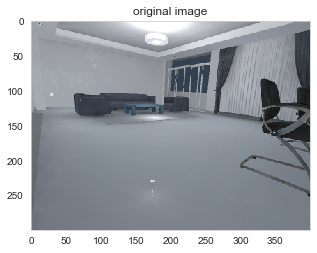

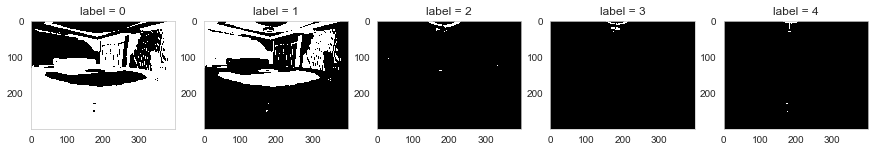

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn has white grid by default, func to get rid of this
sns.set_style("whitegrid", {'axes.grid' : False})

# print the number of labels on img
mi, ma = np.min(seg), np.max(seg)
n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.set_title("original image")

plt.show()

fig = plt.figure(figsize=(15,10))
for k in range(mi,ma+1):
    ax = fig.add_subplot(3,5,k+1) #rows, columns, index
    ax.imshow((seg == k)*1.0) # ax = axis, mul 1.0 because need float, seg == k (print pixels which are true)
    ax.set_title("label = {}".format(k))

plt.show()

# Apply color pallete to mask

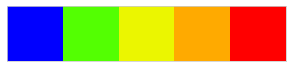

In [6]:
import random
import numpy as np

# setting up color palette

flatui = ["#0000ff","#53ff02","#ebf600","#ffaa00","#ff0000"]
sns.set_palette(flatui)  
sns.palplot(sns.color_palette())

def give_color_to_seg_img(seg,n_classes):
    #seg : (input_width,input_height,3)
    
    if len(seg.shape)==3:     # if the shape of image is 3 (h*w*c)
        seg = seg[:,:,0]      # from (300*400*3) to (300*400)
    
    # array with zeros and 3 channels
    seg_img = np.zeros((seg.shape[0],seg.shape[1], 3)).astype('float') #seg_img = (300,400,3)
   
    colors = sns.color_palette(flatui, n_classes)
    
    for c in range(n_classes):
        # in segc are values of n_class (ex. all 0..4 are true)
        segc = (seg == c); #print('segc is' + str(segc.shape)) #300 400
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

# Vizualize data

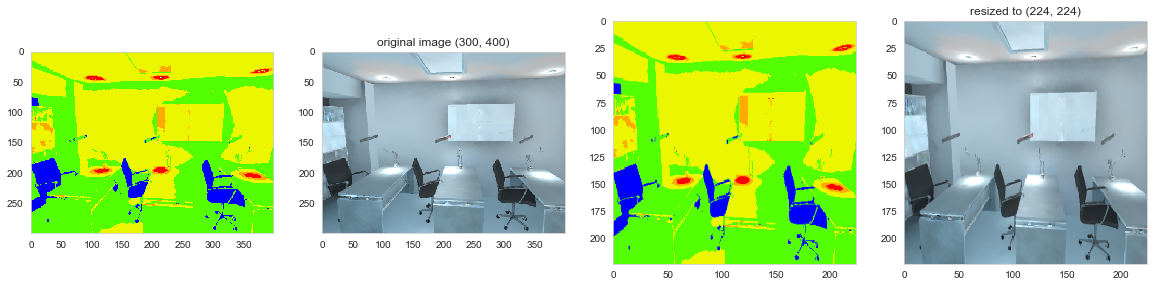

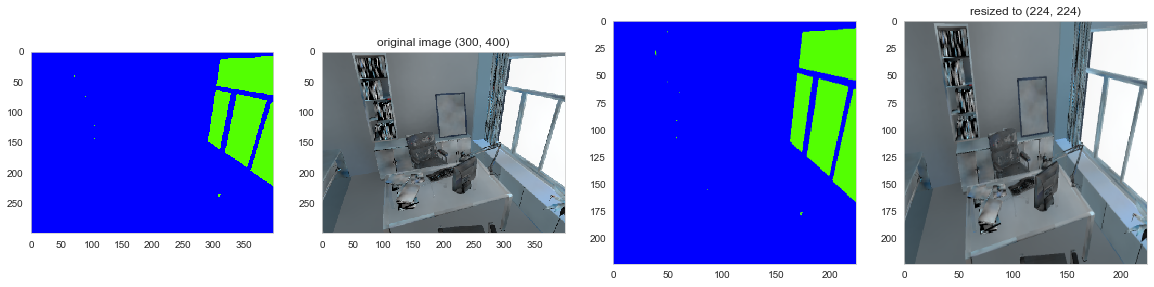

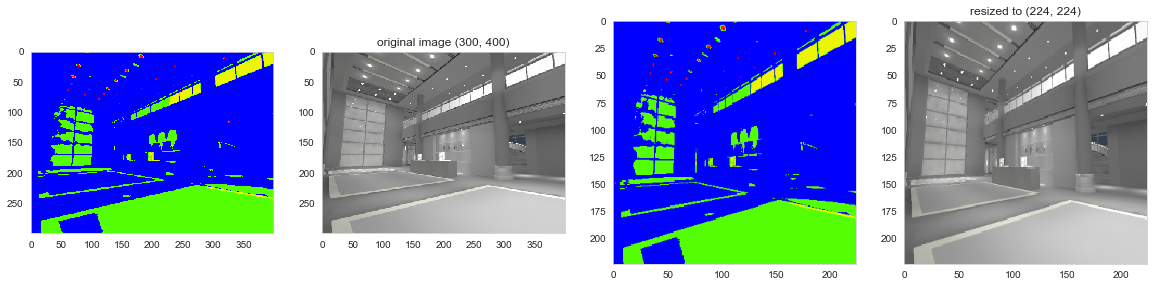

In [7]:
input_height, input_width = 224, 224
output_height, output_width = 224, 224

all_seg = np.array(os.listdir(dir_seg)) # array with names of all segnmented images

for fnm in all_seg[np.random.choice(len(all_seg),3,replace=False)]:
    fnm = fnm.split(".")[0] #remove .png
    seg = cv2.imread(dir_seg + fnm + ".png") # (360, 480, 3)
    img = cv2.imread(dir_img + fnm + ".png")
    seg_img = give_color_to_seg_img(seg,n_classes)

    fig = plt.figure(figsize=(20,40))
    ax = fig.add_subplot(1,4,1)
    ax.imshow(seg_img)
    
    ax = fig.add_subplot(1,4,2)
    ax.imshow(img/255.0)
    ax.set_title("original image {}".format(img.shape[:2]))
    
    ax = fig.add_subplot(1,4,3)
    ax.imshow(cv2.resize(seg_img,(input_height, input_width)))
    
    ax = fig.add_subplot(1,4,4)
    ax.imshow(cv2.resize(img,(output_height , output_width))/255.0)
    ax.set_title("resized to {}".format((output_height, output_width)))
    
    plt.show()

# Packing imgs as array dataset to fit CNN

In [9]:
import pandas as pd 
import numpy as np

# creating dataset with images, X Y arrays with data

def getImageArr(path, width, height):
        img = cv2.imread(path, 1)
        '''Clipping input data to the valid range for imshow 
        with RGB data ([-1..1] for floats or [0..255] for integers).'''
        img = np.float32(cv2.resize(img, (width, height))) / 127.5 - 1
        return img

def getSegmentationArr(path, nClasses, width, height):
    seg_labels = np.zeros((height, width, nClasses))
    img = cv2.imread(path, 1)
    img = cv2.resize(img, (width, height))
    img = img[:, :, 0]

    for c in range(nClasses):
        seg_labels[:, :, c] = (img == c).astype(int)
    ##seg_labels = np.reshape(seg_labels, (width*height,nClasses))
    return seg_labels

images = os.listdir(dir_img)
images.sort()
segmentations = os.listdir(dir_seg)
segmentations.sort()

X = []
Y = []

for im, seg in zip(images, segmentations) :
    X.append(getImageArr(dir_img + im, input_width, input_height))
    Y.append(getSegmentationArr(dir_seg + seg, n_classes, output_width, output_height))

X, Y = np.array(X), np.array(Y)
print(X.shape,Y.shape)

# save X and Y data to npy files

data_path = 'E:/NN\'s/weights, data on so so/'

np.save(data_path + 'X_data', X)
np.save(data_path + 'Y_data', Y)

(260, 224, 224, 3) (260, 224, 224, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


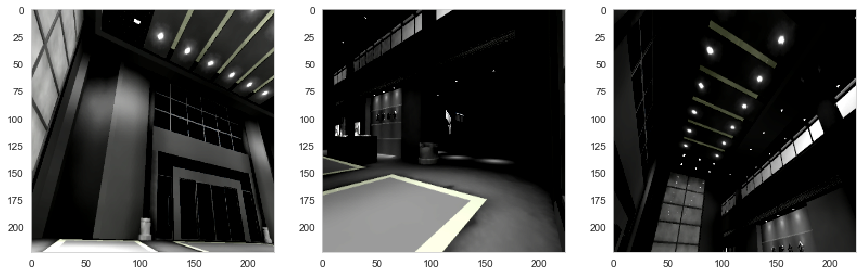

In [10]:
# plot any pictures

fig = plt.figure(figsize=(20,40))
ax = fig.add_subplot(1,4,1)
ax.imshow(X[18])

ax = fig.add_subplot(1,4,2)
ax.imshow(X[19])

ax = fig.add_subplot(1,4,3)
ax.imshow(X[22])

plt.show()